<a href="https://colab.research.google.com/github/MartinSantaGitHub/ds4b/blob/main/4.%20Operations%20Department/Esqueleto_Departamento_de_Operaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1t-Q7JllEobw8YwV3wcTuMA12J9JArfwp)

![alt text](https://drive.google.com/uc?id=1pNAshUhBxksQcrTfulYmUKXUPOmWbXb0)

# TAREA # 2: IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Especificar el directorio del conjunto de entrenamiento
x_ray_directory = '/content/drive/MyDrive/ds4b/4. Operations Department/Dataset'

In [4]:
# Listar las carpetas de dicho directorio
os.listdir(x_ray_directory)

['0', '2', '1', '3']

In [5]:
# Utilizar el generador de imágenes para generar datos de imágenes de tensores y normalizarlos
# Utilizar el 20% de los datos para la validación cruzada posterior
image_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [6]:
# Genere lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# El entrenamiento usará 428 (80%) y la validación usará 104 (20%)
# Realizar muestreo aleatoria y cambio del tamaño en las imágenes

train_generator = image_generator.flow_from_directory(batch_size=40, directory=x_ray_directory, shuffle=True, target_size = (256,256), class_mode='categorical', subset = 'training')

Found 428 images belonging to 4 classes.


In [7]:
train_generator = image_generator.flow_from_directory(batch_size=40, directory=x_ray_directory, shuffle=True, target_size = (256,256), class_mode='categorical', subset = 'validation')

Found 104 images belonging to 4 classes.


In [8]:
# Generar un lote de 40 imágenes y etiquetas
train_images, train_labels = next(train_generator)

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels.shape

(40, 4)

In [11]:
train_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]],

In [12]:
# Traductor de cada Etiqueta

label_names = {0: "COVID-19", 1: "Normal", 2: "Pneumonia Virica", 3: "Pneumonia Bacteriana"}

# TAREA #3: VISUALIZACIÓN DEL DATASET

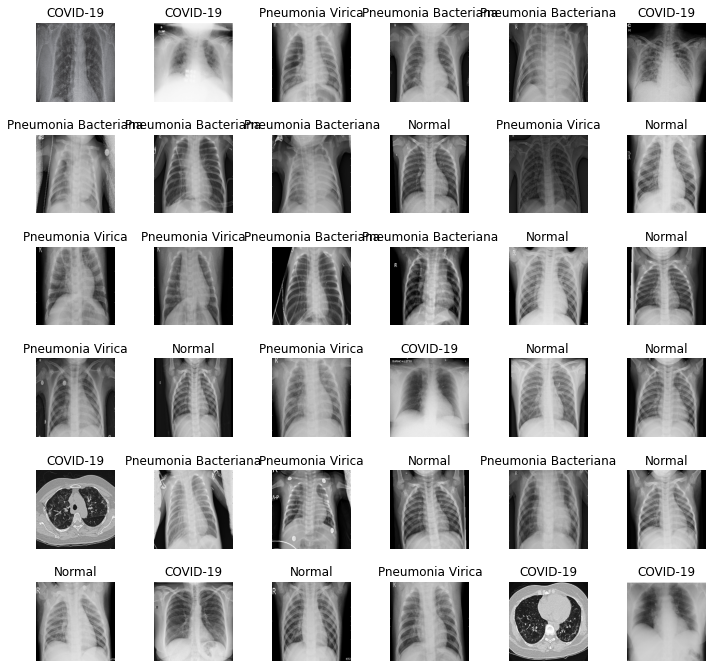

In [13]:
# Crea una matriz de 36 imágenes junto con sus etiquetas correspondientes

L = 6
W = 6

fig, axes = plt.subplots(L,W, figsize = (12,12))

axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(train_images[i])
  axes[i].set_title(label_names[np.argmax(train_labels[i])])
  axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRAS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=1e4bFs8Fh2Bp4ueRi9Q9SASRWZ2SwShJX)

![alt text](https://drive.google.com/uc?id=1zsKnK9bQVjUt5Z38gEK3qnIoafRR6i1c)

![alt text](https://drive.google.com/uc?id=1mL13x1d9uAItMFwtV_9r-fKqQp8DjfQo)

![alt text](https://drive.google.com/uc?id=1-se5iR8RsZ4Bold3MK60hDpL0qky7H97)

# TEORÍA #5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1ypOE6WINmjunchutKTSUbx4FCzuYUyqC)

![alt text](https://drive.google.com/uc?id=16Rhq_7flyuy5oS1vEJ7p3l1Y8irU7Zwg)

![alt text](https://drive.google.com/uc?id=1hCdV7lmgADpw8jV7nf0KO3mMzIMuMZDM)

![alt text](https://drive.google.com/uc?id=1gHDvwWJBBD5d94HPpSydQLb6pjTfknrK)

# TAREA #6: IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [14]:
basemodel = ResNet50(weights="imagenet", include_top = False, input_tensor = Input(shape = (256,256,3)))

94773248/94765736 [==============================] - 1s 0us/step


In [15]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [16]:
# Congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5 
for layer in basemodel.layers[:-10]:
  layer.trainable = False

# TAREA #7: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [17]:
headmodel = basemodel.output

headmodel = AveragePooling2D(pool_size=(8,8))(headmodel)

#Conv2D(filters = 32, kernel_size = (4,4), activation = 'relu')
#headmodel = AveragePooling2D(pool_size=(1,1))(headmodel)

headmodel = Flatten(name = 'flatten')(headmodel)

headmodel = Dense(128, activation = 'relu')(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(128, activation = 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)

headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [18]:
#headmodel = basemodel.output

#headmodel = AveragePooling2D(pool_size=(8,8))(headmodel)
#Conv2D(filters = 32, kernel_size = (4,4), activation = 'relu')
#headmodel = AveragePooling2D(pool_size=(1,1))(headmodel)

#headmodel = Flatten(name = 'flatten')(headmodel)

#headmodel = Dense(128, activation = 'relu')(headmodel)
#headmodel = Dropout(0.5)(headmodel)
#headmodel = Dense(128, activation = 'relu')(headmodel)
#headmodel = Dropout(0.3)(headmodel)

#headmodel = Dense(4, activation = 'softmax')(headmodel)

#model = Model(inputs = basemodel.input, outputs = headmodel)

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4, decay = 1e-6), metrics = ["accuracy"])

In [20]:
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 20)

# Almacenar el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=True, save_best_only=True)

In [21]:
train_generator = image_generator.flow_from_directory(batch_size=4, directory = x_ray_directory, shuffle = True, target_size = (256,256), class_mode = 'categorical', subset = 'training')
val_generator = image_generator.flow_from_directory(batch_size=4, directory = x_ray_directory, shuffle = True, target_size = (256,256), class_mode = 'categorical', subset = 'validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [22]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 4, epochs = 90, 
                              validation_data = val_generator, validation_steps = val_generator.n // 4,
                              callbacks = [checkpointer, early_stopping])

Epoch 1/90
107/107 [==============================] - 145s 1s/step - loss: 1.2399 - accuracy: 0.4369 - val_loss: 1.6901 - val_accuracy: 0.2500

Epoch 00001: val_loss improved from inf to 1.69010, saving model to weights.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/90
107/107 [==============================] - 134s 1s/step - loss: 0.9626 - accuracy: 0.6192 - val_loss: 1.8226 - val_accuracy: 0.4615

Epoch 00002: val_loss did not improve from 1.69010
Epoch 3/90
107/107 [==============================] - 139s 1s/step - loss: 0.8336 - accuracy: 0.6495 - val_loss: 2.2712 - val_accuracy: 0.3654

Epoch 00003: val_loss did not improve from 1.69010
Epoch 4/90
107/107 [==============================] - 136s 1s/step - loss: 0.7213 - accuracy: 0.7243 - val_loss: 1.6551 - val_accuracy: 0.5769

Epoch 00004: val_loss improved from 1.69010 to 1.65509, saving model to weights.hdf5
Epoch 5/90
107/107 [==============================] - 135s 1s/step - loss: 0.7101 - accuracy: 0.7220 - val_loss: 0.7199 - val_accuracy: 0.7212

Epoch 00005: val_loss improved from 1.65509 to 0.71986, saving model to weights.hdf5
Epoch 6/90
107/107 [==============================] - 136s 1s/step - loss: 0.6972 - accuracy: 0.7383 - val_loss: 0.6042 - val_accuracy: 0.7596

Epoch 00

# TAREA #8: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

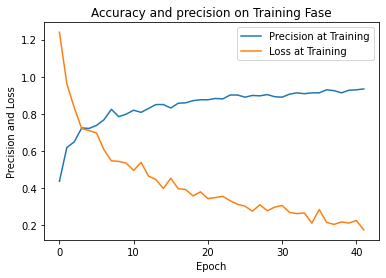

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title("Accuracy and precision on Training Fase")
plt.xlabel("Epoch")
plt.ylabel("Precision and Loss")
plt.legend(["Precision at Training", "Loss at Training"])

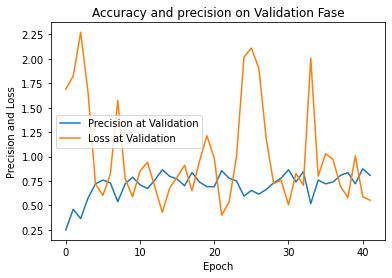

In [25]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])

plt.title("Accuracy and precision on Validation Fase")
plt.xlabel("Epoch")
plt.ylabel("Precision and Loss")
plt.legend(["Precision at Validation", "Loss at Validation"])

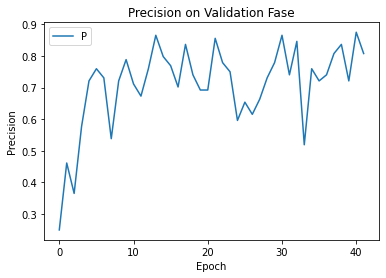

In [26]:
plt.plot(history.history['val_accuracy'])

plt.title("Precision on Validation Fase")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend("Precision at Validation")

In [27]:
test_directory = '/content/drive/MyDrive/ds4b/4. Operations Department/Test'

In [28]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_directory(batch_size=40, directory=test_directory, target_size=(256,256), class_mode='categorical')

Found 40 images belonging to 4 classes.


In [37]:
#model.load_weights("/content/drive/MyDrive/ds4b/4. Operations Department/weights.hdf5")
model.load_weights("/content/weights.hdf5")

In [39]:
evaluate = model.evaluate(test_generator, steps=test_generator.n // 4, verbose=1)
print(f"Precision on Testing Fase: {evaluate[1]}")

10/10 [==============================] - 9s 2ms/step - loss: 0.7946 - accuracy: 0.8000
Precision on Testing Fase: 0.800000011920929


In [40]:
predictions = []
originals = []
images = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory, str(i))):
    img = cv2.imread(os.path.join(test_directory, str(i), item))
    img = cv2.resize(img, (256,256))
    images.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    predictions.append(predict)
    originals.append(i)

In [41]:
len(originals)

40

In [42]:
scores = accuracy_score(originals, predictions)
f1_scores = f1_score(np.asarray(originals), np.asarray(predictions), average=None)
print(f"Prediction's Efficacy: {scores}\nF1 Score: {f1_scores}")

Prediction's Efficacy: 0.8
F1 Score: [0.9        0.75       0.66666667 0.85714286]


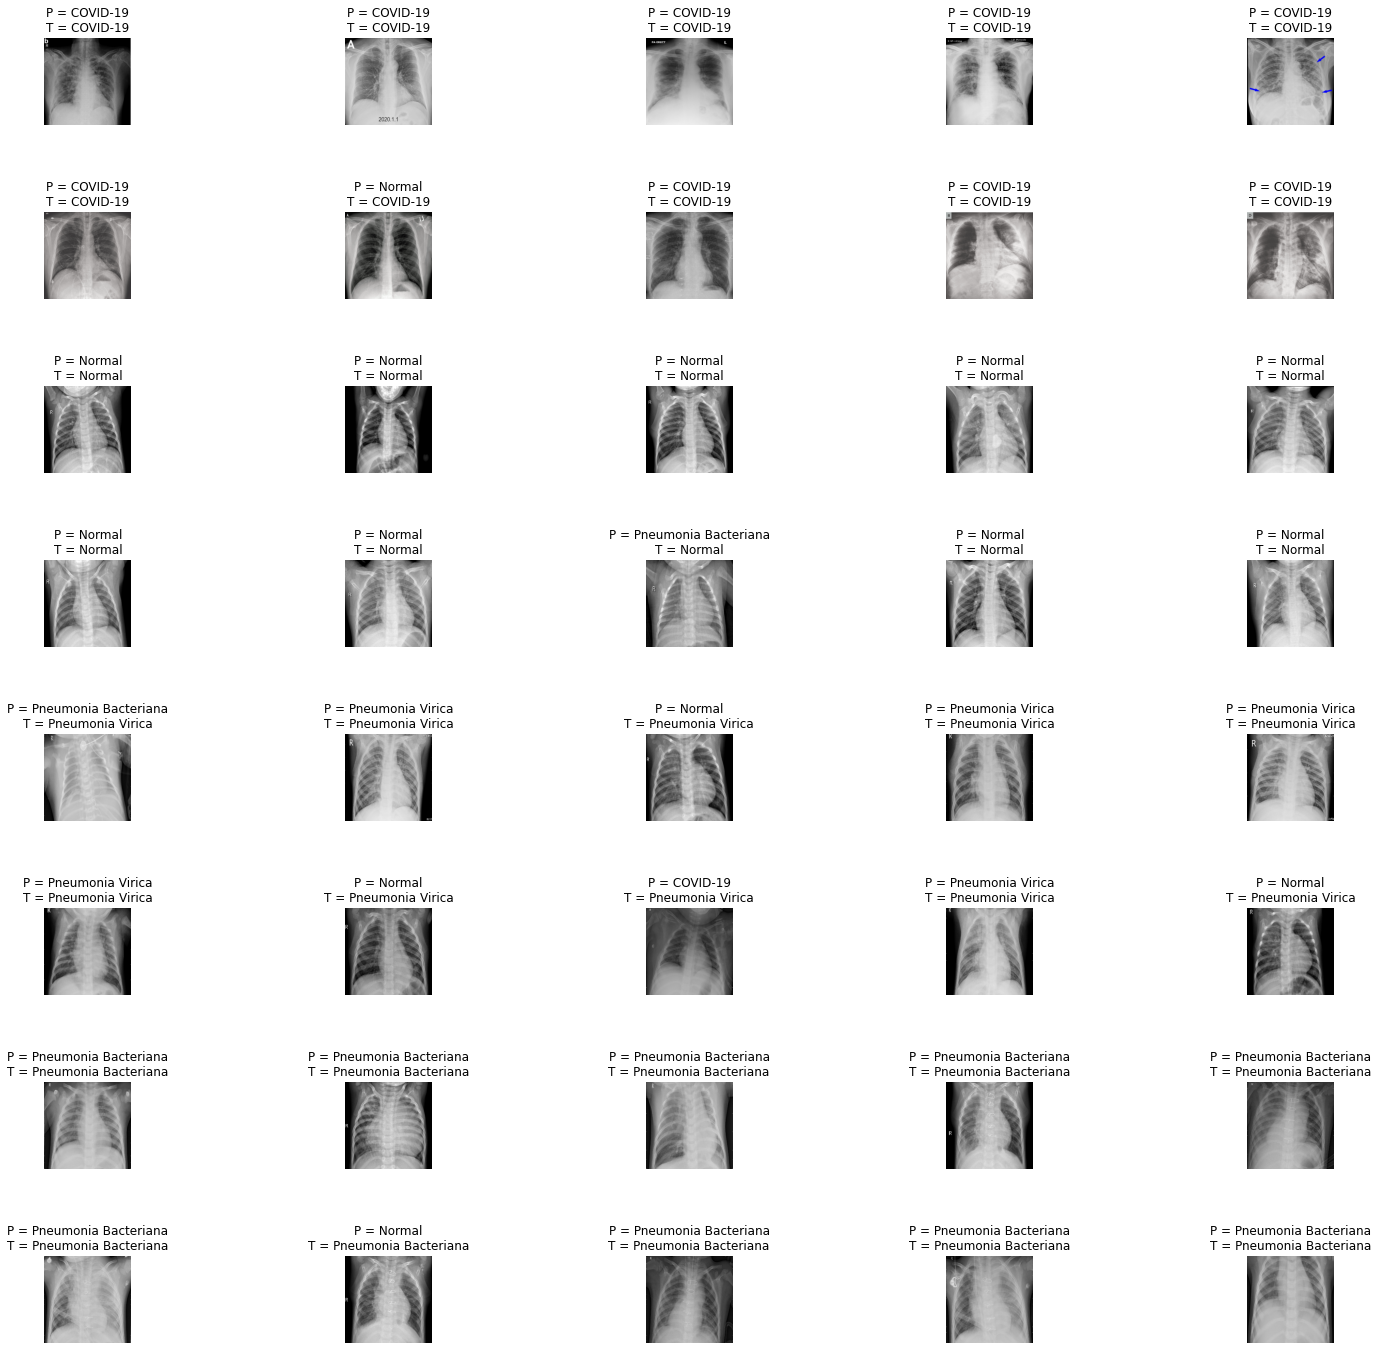

In [43]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize = (24,24))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(images[i])
  axes[i].set_title(f"P = {label_names[predictions[i]]}\nT = {label_names[originals[i]]}")
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2, hspace = 1)

In [44]:
print(classification_report(np.asarray(originals), np.asarray(predictions)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.64      0.90      0.75        10
           2       1.00      0.50      0.67        10
           3       0.82      0.90      0.86        10

    accuracy                           0.80        40
   macro avg       0.84      0.80      0.79        40
weighted avg       0.84      0.80      0.79        40



Text(0.5, 1.0, 'Confusion Matrix')

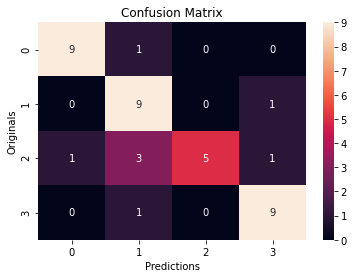

In [45]:
cm = confusion_matrix(np.asarray(originals), np.asarray(predictions))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("Predictions")
ax.set_ylabel("Originals")
ax.set_title("Confusion Matrix")

# BUEN TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS NUEVAS HABILIDADES ADQUIRIDAS
